In [2]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [3]:
#Import data sets
happy17=pd.DataFrame(pd.read_csv('CSVs/Happiness_2017.csv'))
mental_health=pd.DataFrame(pd.read_csv('CSVs/prevalence-by-mental-and-substance-use-disorder.csv'))
happy17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
#Select mental health data from 2017, sum prevalences of each disorder
mental_health_17=mental_health[mental_health['Year']==2017]
mental_health_17['Total']= mental_health_17.iloc[:, 3:10].sum(axis=1)
mental_health_17.head()

C:\Users\ktauf\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Total
27,Afghanistan,AFG,2017,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217,13.135369
55,Albania,ALB,2017,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955,9.028779
83,Algeria,DZA,2017,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191,12.339592
111,American Samoa,ASM,2017,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277,9.065249
139,Andean Latin America,NaN,2017,0.201471,0.881737,0.355475,4.267738,0.661481,2.610385,1.533573,10.511861


In [5]:
#Narrow selection of columns for mental health data
mh17=mental_health_17[['Entity','Code','Total']]
mh17=mh17.rename(columns={'Entity':'Country','Total':'Prevalence of Combined Disorders'})

mh17.head()

,Country,Code,Prevalence of Combined Disorders
27,Afghanistan,AFG,13.135369
55,Albania,ALB,9.028779
83,Algeria,DZA,12.339592
111,American Samoa,ASM,9.065249
139,Andean Latin America,NaN,10.511861


In [6]:
#import dataset with ISO country codes, merge with 2017 happiness data
happy19=pd.read_csv('CSVs/country_iso.csv')
happy19 = happy19.drop(['Unnamed: 0'], axis=1)
happy17 = happy17[['Country', 'Happiness.Score']]
happy1719 = pd.merge(happy19, happy17, on='Country', how='inner')
happy1719 = happy1719.rename(columns = {'Happiness score':'2019 Happiness Score', 'Happiness.Score': '2017 Happiness Score',
                                       'iso_a3':'Code'})
happy1719.head()

,Country,2019 Happiness Score,Code,2017 Happiness Score
0,Finland,7.769,FIN,7.469
1,Denmark,7.600,DNK,7.522
2,Norway,7.554,NOR,7.537
3,Iceland,7.494,ISL,7.504
4,Netherlands,7.488,NLD,7.377


In [7]:
#merge happiness and mental health dataframes
happy_mh = pd.merge(happy1719, mh17, on='Code', how='inner')
happy_mh.head()

,Country_x,2019 Happiness Score,Code,2017 Happiness Score,Country_y,Prevalence of Combined Disorders
0,Finland,7.769,FIN,7.469,Finland,13.959981
1,Denmark,7.600,DNK,7.522,Denmark,13.032190
2,Norway,7.554,NOR,7.537,Norway,15.247450
3,Iceland,7.494,ISL,7.504,Iceland,12.413469
4,Netherlands,7.488,NLD,7.377,Netherlands,14.186208


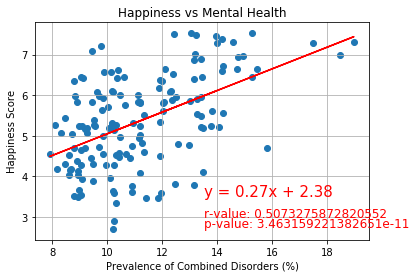

R-value: 0.5073275872820552, P-value: 3.463159221382651e-11


In [8]:
#Linear Regression!
y_values=happy_mh['2017 Happiness Score']
x_values=happy_mh['Prevalence of Combined Disorders']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Happiness vs Mental Health')
plt.xlabel('Prevalence of Combined Disorders (%)')
plt.ylabel('Happiness Score')
r_value=(f"r-value: {rvalue}")
p_value=(f"p-value: {pvalue}")
plt.annotate(line_eq,(13.5,3.5),fontsize=15,color="red")
plt.annotate(r_value,(13.5,3),fontsize=12,color="red")
plt.annotate(p_value,(13.5,2.75),fontsize=12,color="red")
plt.grid()
plt.savefig('Images/mental_health.png')
plt.show()
print(f"R-value: {rvalue}, P-value: {pvalue}")

In [9]:
#Moderate correlation!
len(happy_mh)

150

In [10]:
#Import dataset with geographical info for graphing
import geopandas 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'iso_a3':'Code'}) 
world = pd.merge(world, happy_mh, on='Code', how='inner')
world.head()

,pop_est,continent,name,Code,gdp_md_est,geometry,Country_x,2019 Happiness Score,2017 Happiness Score,Country_y,Prevalence of Combined Disorders
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,3.231,3.349,Tanzania,10.312122
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,7.278,7.316,Canada,14.570482
2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,6.892,6.993,United States,18.461198
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,5.809,5.819,Kazakhstan,11.189189
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,6.174,5.971,Uzbekistan,8.828123


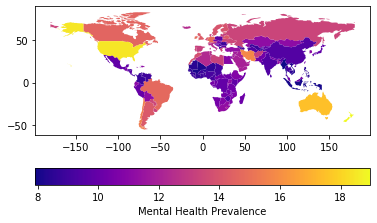

In [11]:
#Chorograph of Mental Illness Prevalence
fig, ax = plt.subplots(1,1)
world.plot(column='Prevalence of Combined Disorders', cmap='plasma', ax=ax, legend=True, 
           legend_kwds={'label': "Mental Health Prevalence", 'orientation': "horizontal"})

plt.savefig('Images/mental health map 2017.png')

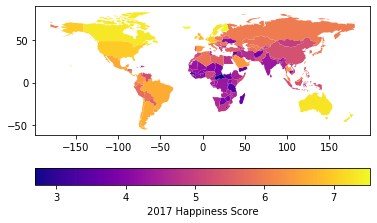

In [12]:
#chorograph of 2017 happiness data
fig, ax = plt.subplots(1,1)
world.plot(column='2017 Happiness Score', cmap='plasma', ax=ax, legend=True, 
           legend_kwds={'label': "2017 Happiness Score", 'orientation': "horizontal"})

plt.savefig('Images/happiness_2017_map.png')